# House Prices Prediction

## Importing:

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# get_description() is a function to get the description of any column name or a value.
# It takes the column/value name, or any list of them:
from data_description import get_description

%matplotlib inline
sns.set_style('darkgrid')

### Importing the 'train.csv' and 'test.csv' files:

In [199]:
train = pd.read_csv('data/train.csv', index_col='Id')
test = pd.read_csv('data/test.csv', index_col='Id')

In [200]:
# X_train is the training features data
X_train = train.drop(['SalePrice'], axis=1)
# y is the target variable [SalePrice]
y = pd.DataFrame(train['SalePrice'])

# X is the combination of the features data from 'train' and 'test'. This is where we'll deal with the NaV values.
X = pd.concat([X_train, test], axis=0)


## Cleaning the Dataset:

### Checking Missing Values:

In [201]:
missing_count = X.isna().sum(axis=0)
missing_percent = missing_count / len(X) * 100
missing_data = pd.DataFrame({
    'NaN Count': missing_count,
    'Percentage [%]': missing_percent
}).sort_values(by='NaN Count', ascending=False)
missing_data.index.name = 'Column Name'

missing_data = missing_data[missing_data['NaN Count'] > 0]
missing_data

,NaN Count,Percentage [%]
Column Name,,
PoolQC,2909,99.657417
MiscFeature,2814,96.402878
Alley,2721,93.216855
Fence,2348,80.438506
MasVnrType,1766,60.500171
FireplaceQu,1420,48.646797
LotFrontage,486,16.649538
GarageYrBlt,159,5.447071
GarageFinish,159,5.447071


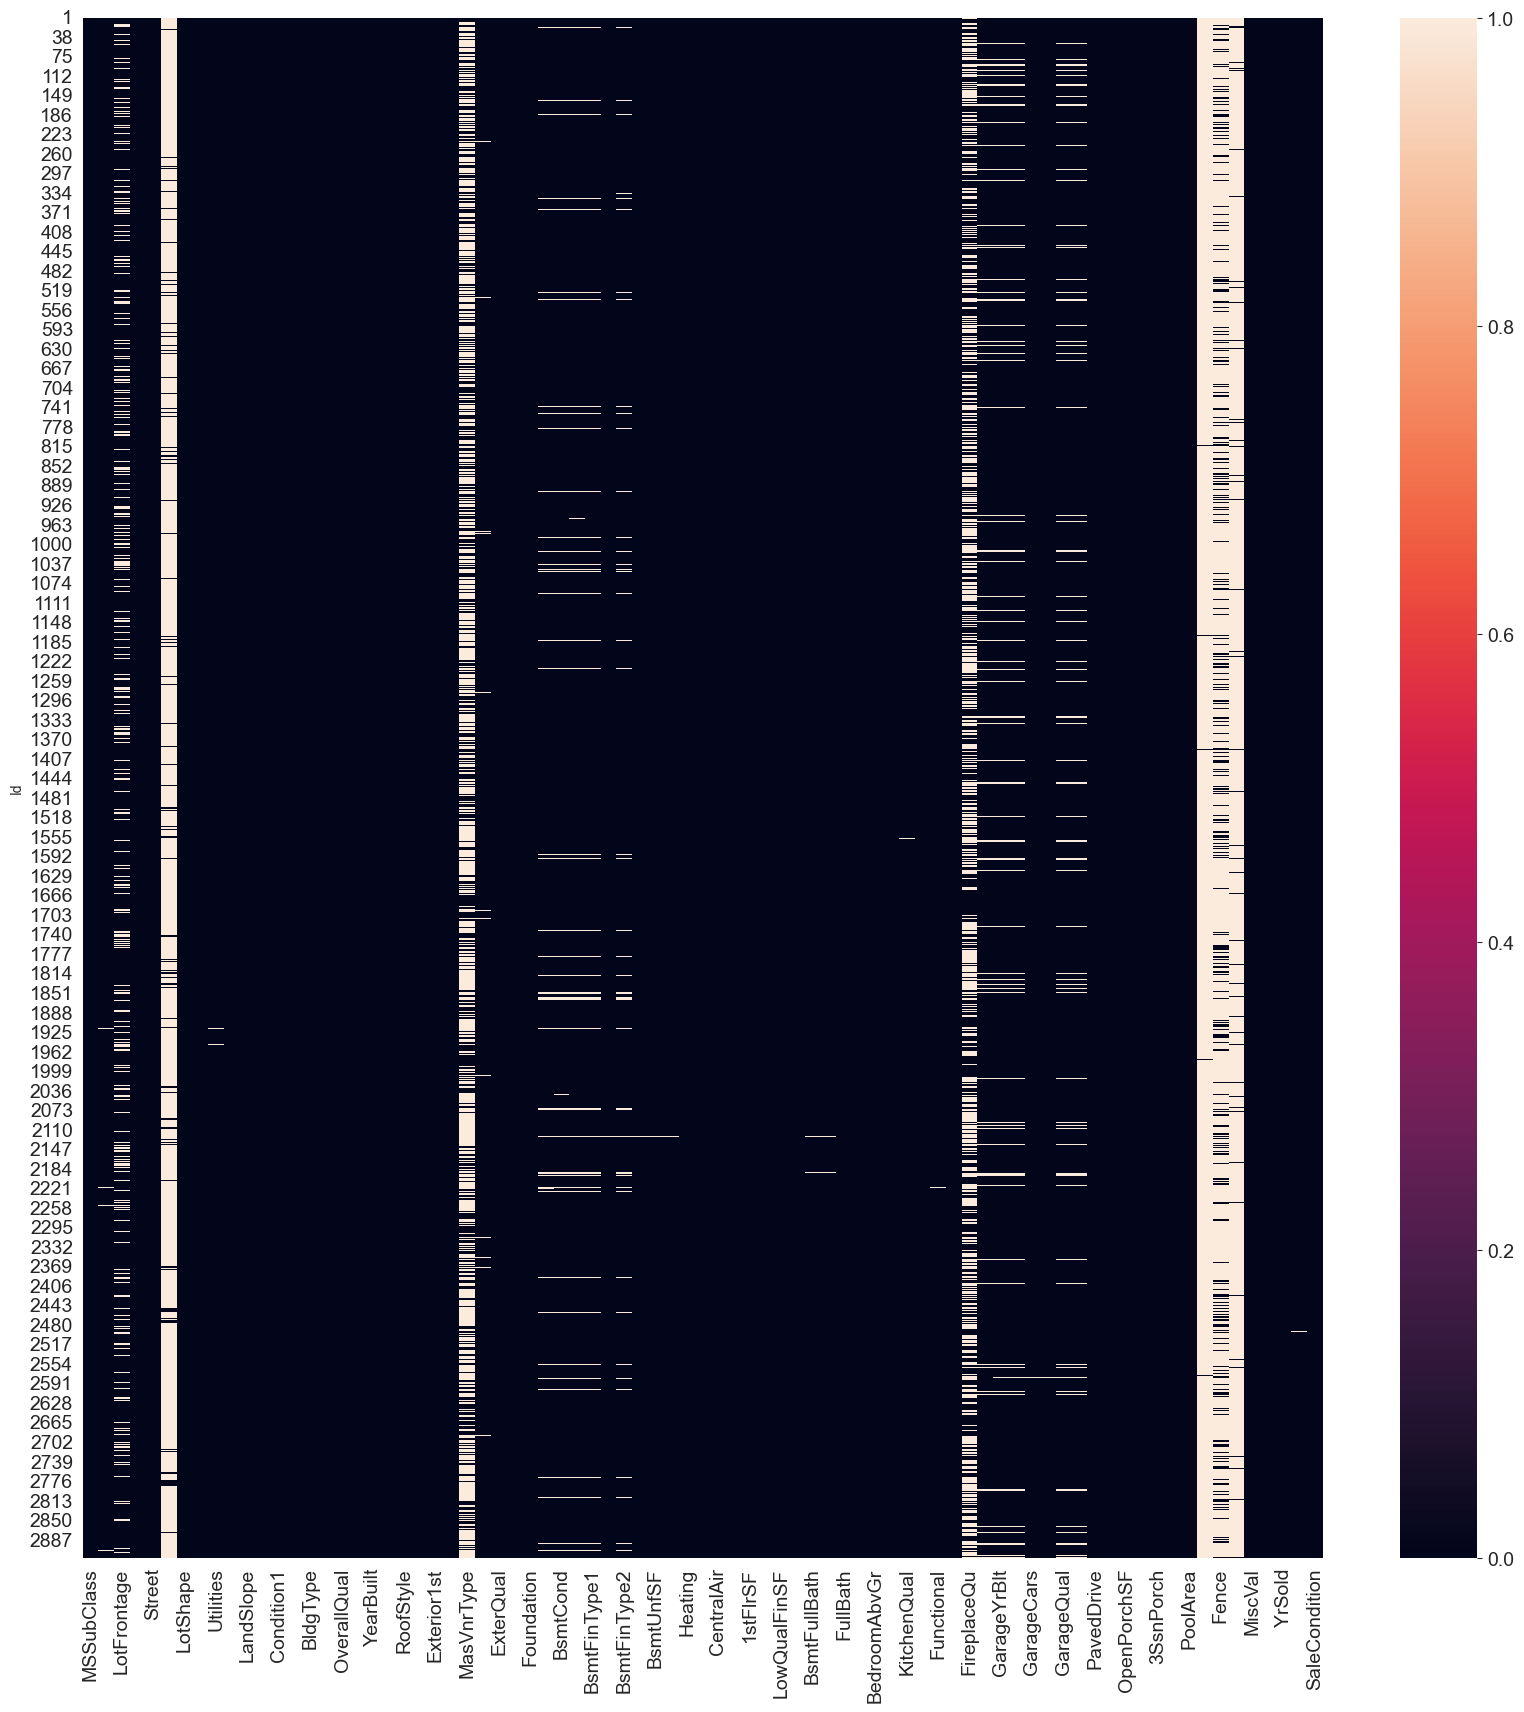

In [202]:
plt.figure(figsize=(20,20))
sns.heatmap(X.isnull())
plt.show()

### Imputing NaN Values:

1. For numerical variables, replace with zero, when the house doesn't have the feature.

In [203]:
X['GarageCars'].fillna(0, inplace=True)
X['GarageArea'].fillna(0, inplace=True)
X['BsmtFinSF1'].fillna(0, inplace=True)
X['BsmtFinSF2'].fillna(0, inplace=True)
X['BsmtUnfSF'].fillna(0, inplace=True)
X['TotalBsmtSF'].fillna(0, inplace=True)
X['BsmtFullBath'].fillna(0, inplace=True)
X['BsmtHalfBath'].fillna(0, inplace=True)
X['MasVnrArea'].fillna(0, inplace=True)

2. For numerical variables, replace with the median, when the NaN means the value is missing.


In [204]:
X['LotFrontage'] = X['LotFrontage'].fillna(X['LotFrontage'].median())

3 For categorical variables, replace with 'None', when the house doesn't have the feature.


In [205]:
X['MasVnrType'] = X['MasVnrType'].fillna('No_Bsmt')
X['BsmtQual'] = X['BsmtQual'].fillna('No_Bsmt')
X['BsmtCond'] = X['BsmtCond'].fillna('No_Bsmt')
X['BsmtExposure'] = X['BsmtExposure'].fillna('No_Bsmt')
X['BsmtFinType1'] = X['BsmtFinType1'].fillna('No_Bsmt')
X['BsmtFinType2'] = X['BsmtFinType2'].fillna('No_Bsmt')

X["GarageCond"] = X["GarageCond"].fillna("No_Garage")
X['GarageType'] = X['GarageType'].fillna('No_Garage')
X['GarageFinish'] = X['GarageFinish'].fillna('No_Garage')
X['GarageQual'] = X['GarageQual'].fillna('No_Garage')

X["PoolQC"] = X["PoolQC"].fillna("No_Pool")
X["Fence"] = X["Fence"].fillna("No_Fence")
X["MiscFeature"] = X["MiscFeature"].fillna("No_MiscFeature")
X['FireplaceQu'] = X['FireplaceQu'].fillna('No_Fireplace')
X['Alley'] = X['Alley'].fillna('No_Alley')

4. For categorical variables, replace with the mode (most accuring value), where NaN means value is missing.


In [206]:
X['MSZoning'].fillna(X['MSZoning'].mode()[0], inplace=True)
X['Utilities'].fillna(X['Utilities'].mode()[0], inplace=True)
X['Exterior1st'].fillna(X['Exterior1st'].mode()[0], inplace=True)
X['Exterior2nd'].fillna(X['Exterior2nd'].mode()[0], inplace=True)
X['Electrical'].fillna(X['Electrical'].mode()[0], inplace=True)
X['Functional'].fillna(X['Functional'].mode()[0], inplace=True)
X['SaleType'].fillna(X['SaleType'].mode()[0], inplace=True)
X['KitchenQual'].fillna(X['KitchenQual'].mode()[0], inplace=True)

5. 'GarageYrBlt' will be replaced with 'YearBlt'.

In [207]:
X['GarageYrBlt'] = X['GarageYrBlt'].fillna(X['YearBuilt'])

#### After Imputung:

In [208]:
X.isna().sum(axis=0).sum()

0

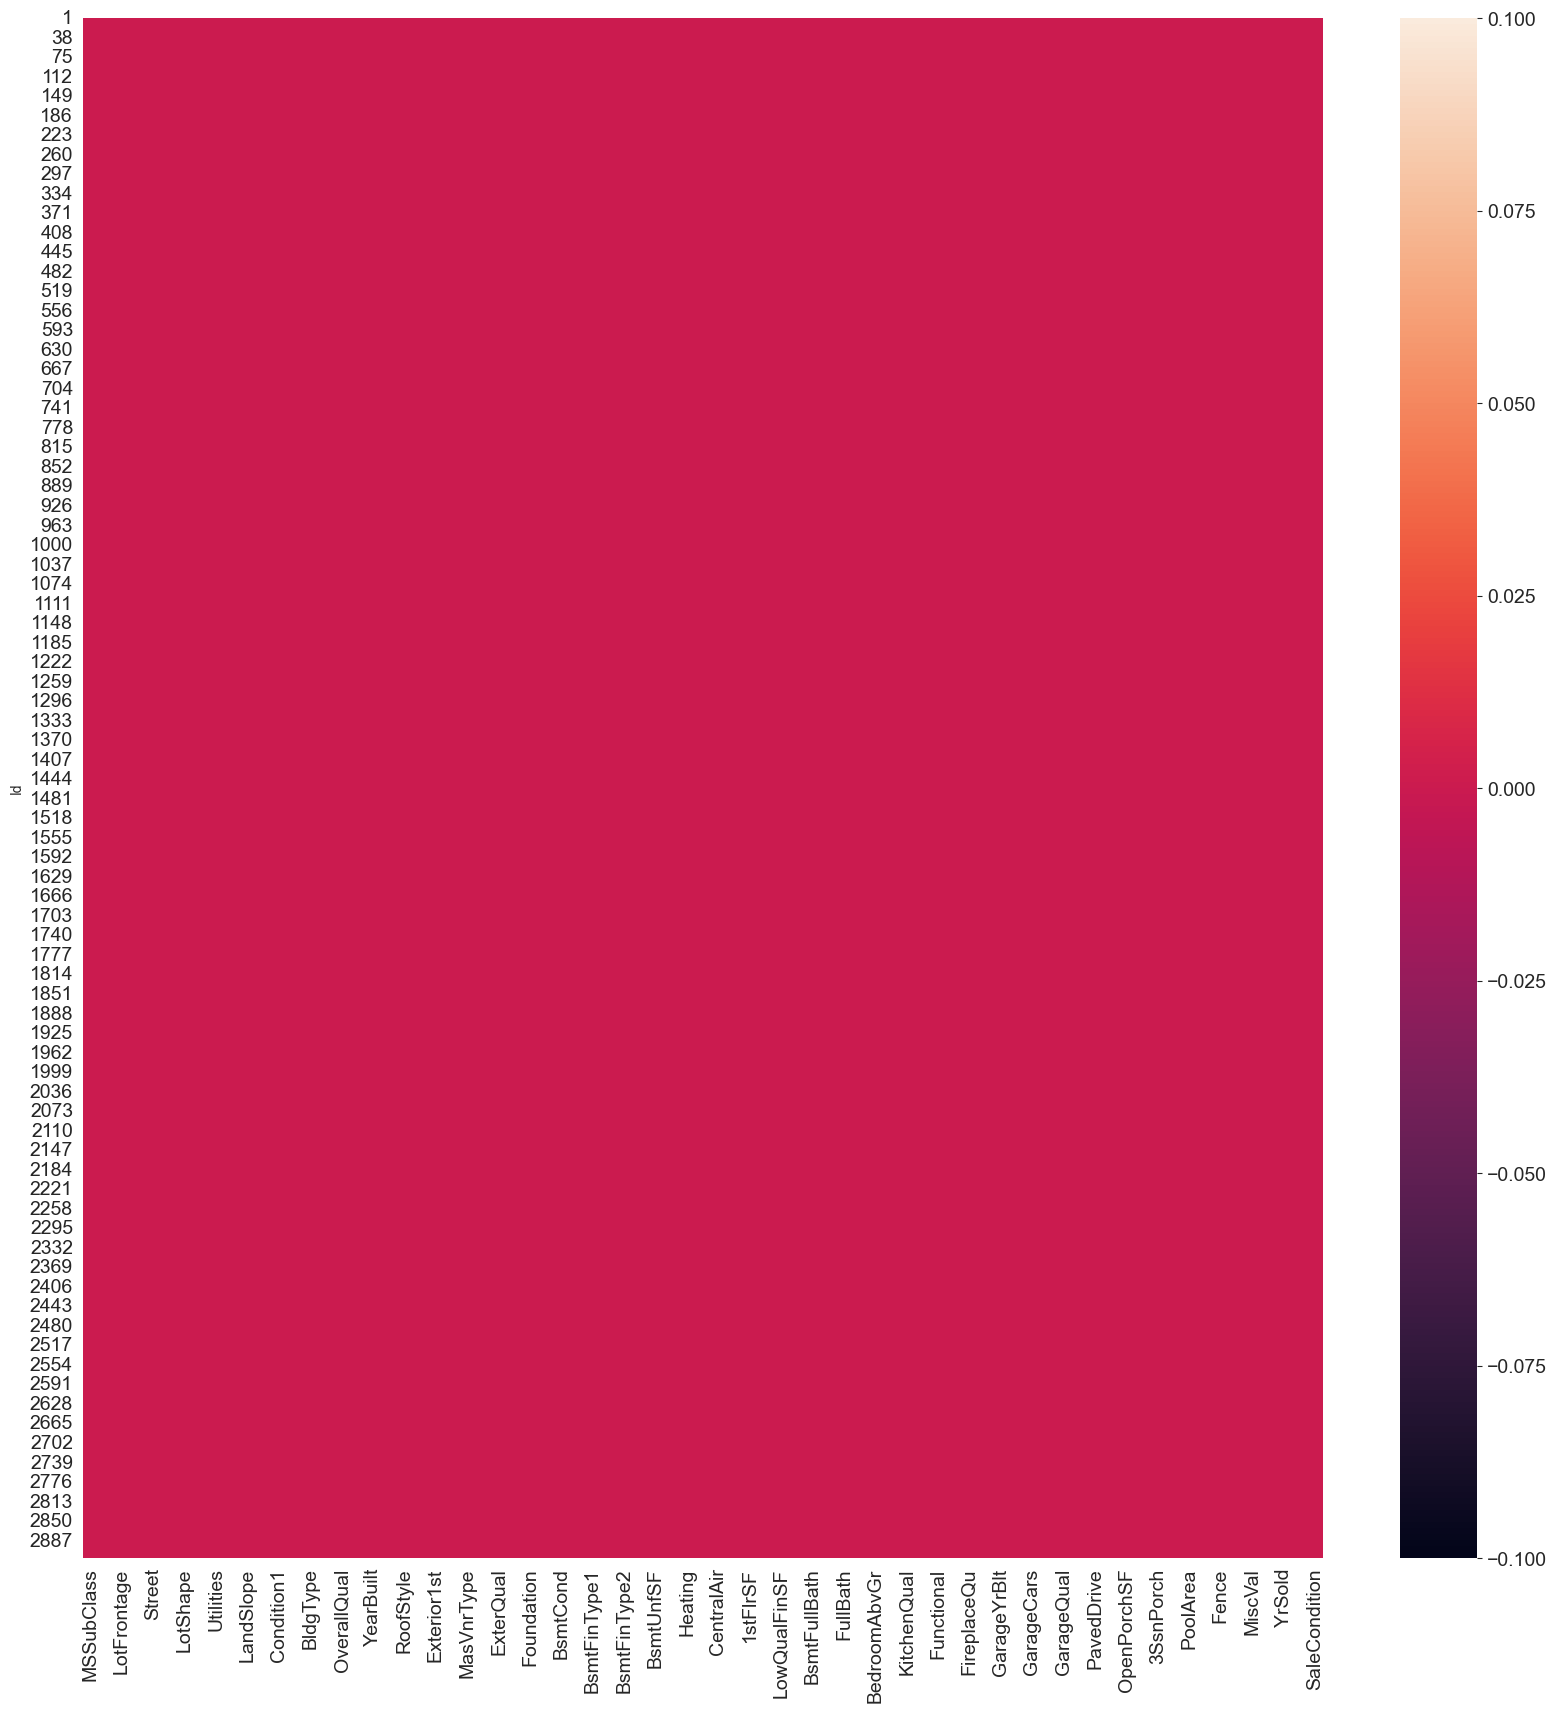

In [209]:
plt.figure(figsize=(20,20))
sns.heatmap(X.isnull())
plt.show()

#### Saving the clean dataset to new files:

In [210]:
# clean_dataset has both 'train.csv' and 'test.csv' after filling the missing values.
clean_dataset = pd.concat([X, y], axis=1).reset_index()
clean_dataset.to_csv('data/clean_dataset.csv')

### Feature Engineering 

In [211]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuilt    

In [212]:
n=X.shape[0]


print(n)
def dist(X,n,m):
    n= X.shape[0]
    liste = []
    for i in range(n):
        
        liste.append(X.iloc[i,m])
    liste = np.unique(liste)       
    return liste


for i in range(16):
    
    print(f"{X.columns[i]} : {dist(X,n,i)}")  
    print("\n")          


2919
MSSubClass : [ 20  30  40  45  50  60  70  75  80  85  90 120 150 160 180 190]


MSZoning : ['C (all)' 'FV' 'RH' 'RL' 'RM']


LotFrontage : [ 21.  22.  24.  25.  26.  28.  30.  31.  32.  33.  34.  35.  36.  37.
  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.
  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.
  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.
  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.
  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106. 107.
 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120. 121.
 122. 123. 124. 125. 126. 128. 129. 130. 131. 133. 134. 135. 136. 137.
 138. 140. 141. 144. 149. 150. 152. 153. 155. 160. 168. 174. 182. 195.
 200. 313.]


LotArea : [  1300   1470   1476 ... 159000 164660 215245]


Street : ['Grvl' 'Pave']


Alley : ['Grvl' 'No_Alley' 'Pave']


LotShape : ['IR1' 'IR2' 'IR3' 'Reg']


LandContour : ['Bnk' 'HLS' 'Low' 'Lvl']

In [213]:
categorical = [x for x in X.columns if X[x].dtype == 'object']
numerical =[x for x in X.columns if X[x].dtype != 'object']
categorical
numerical

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

#### Here we use a pipeline in order to deal with existing numerical data. The pipeline contains the following:
    - Scaling the data using different scaling methods 
    - OLS to check for significant variables(out the pipeline)
    - PCA for dimensionality reduction
    - Random forest model

    



In [214]:
#zscore for normalization
def zscore_normalize_features(X):
    """
    computes  X, zcore normalized by column
    
    Args:
      X (ndarray (m,n))     : input data, m examples, n features
      
    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # find the mean of each column/feature
    mu     = np.mean(X, axis=0)                 # mu will have shape (n,)
    # find the standard deviation of each column/feature
    sigma  = np.std(X, axis=0)                  # sigma will have shape (n,)
    # element-wise, subtract mu for that column from each example, divide by std for that column
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)
 

In [215]:
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()

In [216]:
from sklearn.preprocessing import MinMaxScaler
MinMax =MinMaxScaler()


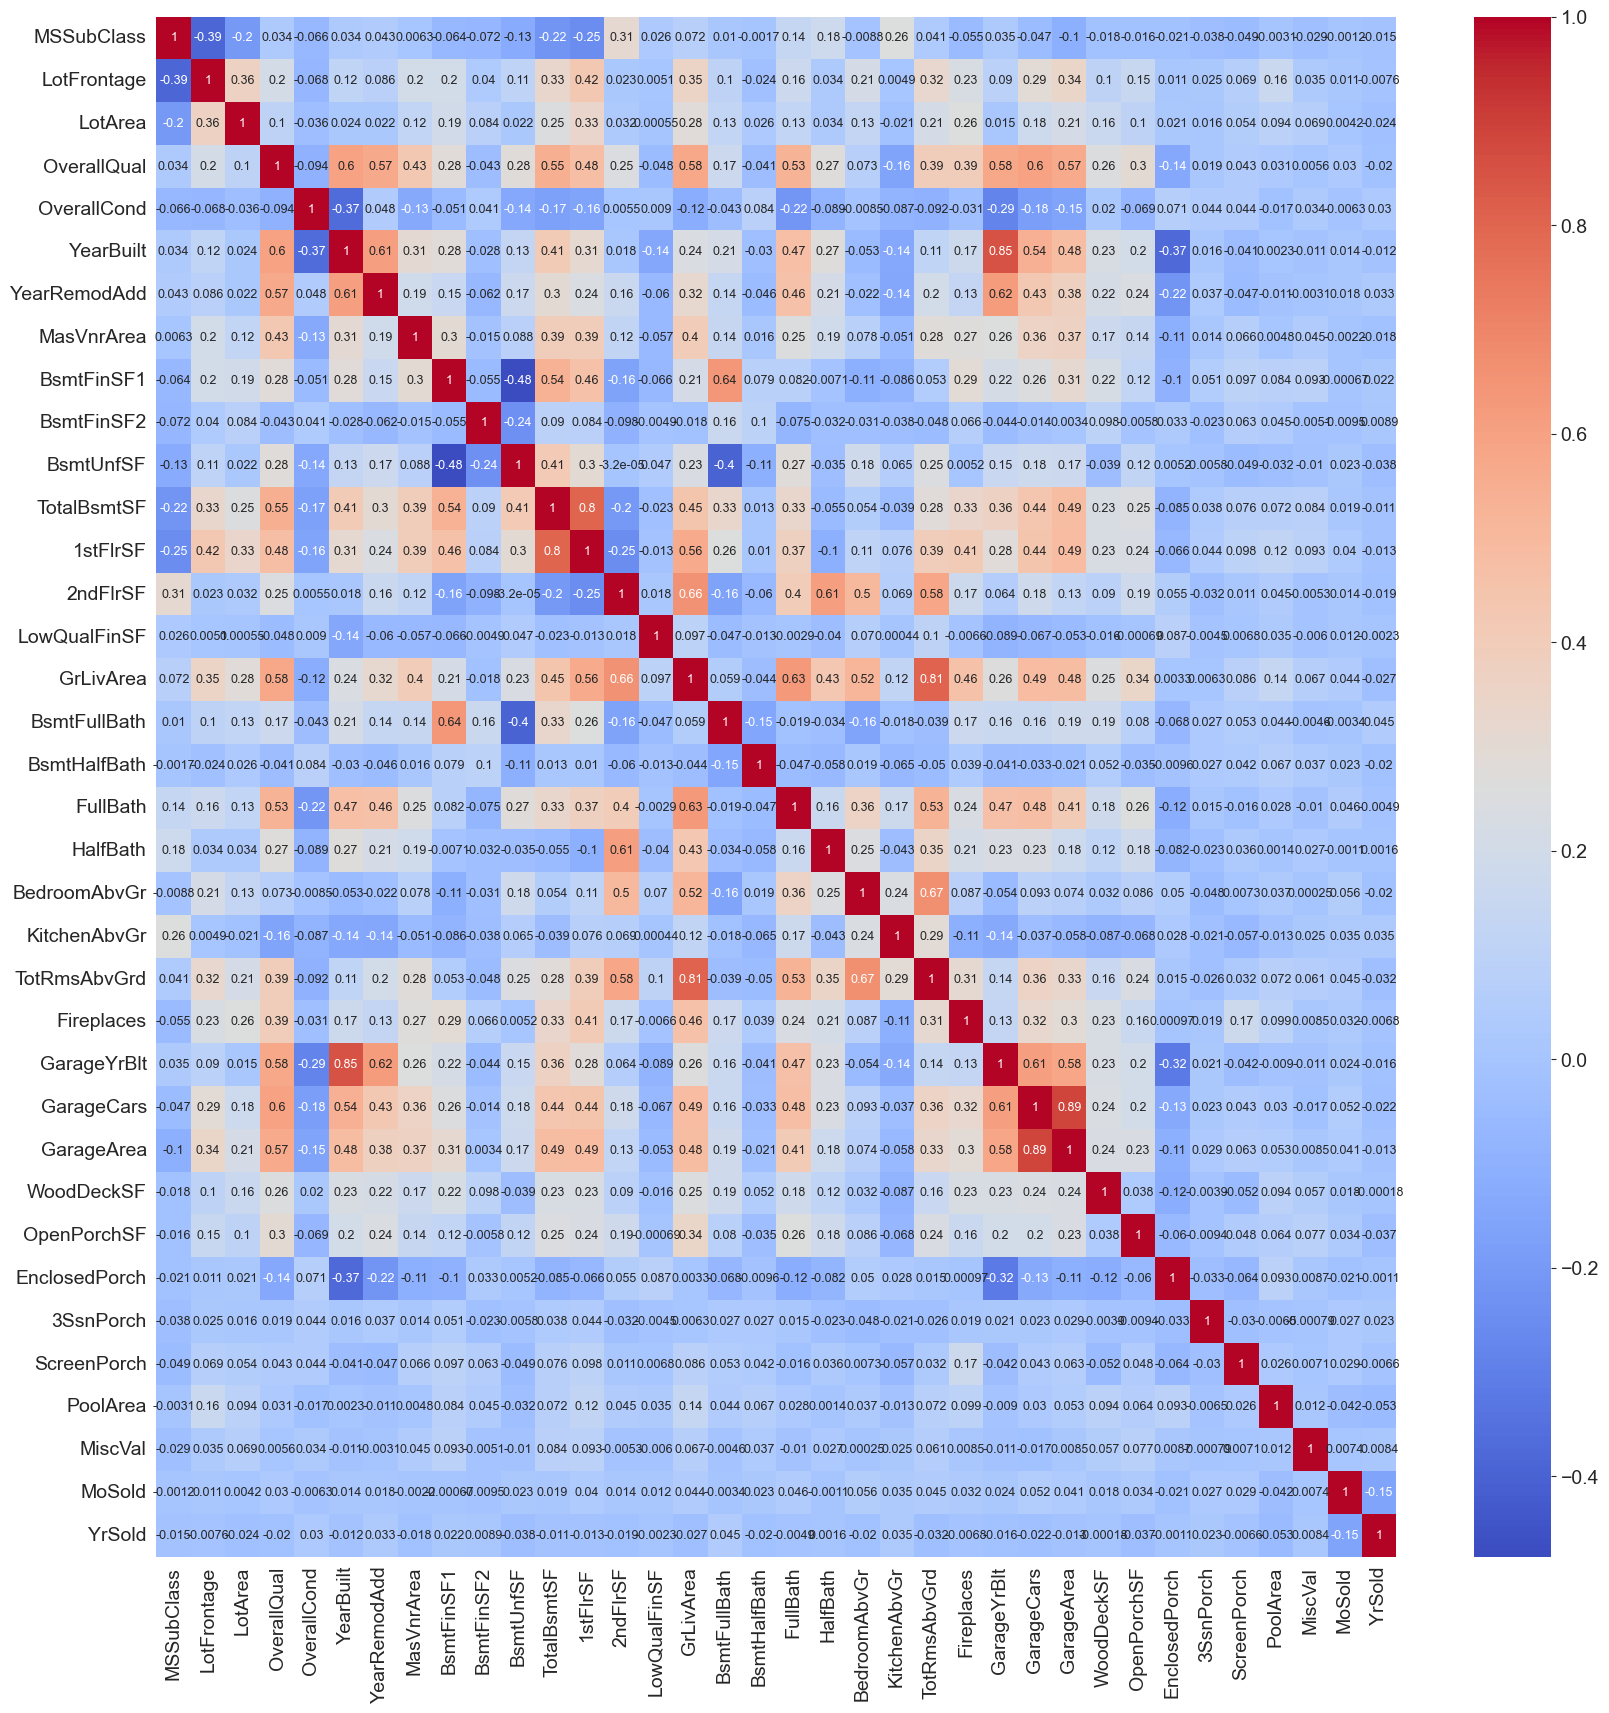

In [217]:
corr = X[numerical].corr()
plt.figure(figsize=(20,20))
plt.rcParams["xtick.labelsize"] =14
plt.rcParams["ytick.labelsize"] =14

sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,cmap='coolwarm',
            annot=True,annot_kws={"fontsize":9},fmt='.2g')
plt.show()

In [218]:
X[numerical].info()

<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   LotFrontage    2919 non-null   float64
 2   LotArea        2919 non-null   int64  
 3   OverallQual    2919 non-null   int64  
 4   OverallCond    2919 non-null   int64  
 5   YearBuilt      2919 non-null   int64  
 6   YearRemodAdd   2919 non-null   int64  
 7   MasVnrArea     2919 non-null   float64
 8   BsmtFinSF1     2919 non-null   float64
 9   BsmtFinSF2     2919 non-null   float64
 10  BsmtUnfSF      2919 non-null   float64
 11  TotalBsmtSF    2919 non-null   float64
 12  1stFlrSF       2919 non-null   int64  
 13  2ndFlrSF       2919 non-null   int64  
 14  LowQualFinSF   2919 non-null   int64  
 15  GrLivArea      2919 non-null   int64  
 16  BsmtFullBath   2919 non-null   float64
 17  BsmtHalfBath   2919 non-null   float64
 18  FullBath     

In [219]:
import statsmodels.api as sm

X_sm = sm.add_constant(X[numerical])


lr = sm.OLS(y,X_sm.iloc[:1460,:]).fit()

In [220]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     182.0
Date:                Fri, 14 Jul 2023   Prob (F-statistic):               0.00
Time:                        18:47:27   Log-Likelihood:                -17321.
No. Observations:                1460   AIC:                         3.471e+04
Df Residuals:                    1425   BIC:                         3.490e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.565e+05   1.41e+06      0.393

#### Here we find out that that out of 36 numerical columns there are 17 that has p values > 0.05 which are classified as non significant

In [221]:
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators=50,max_depth=5)



In [222]:
from sklearn. decomposition import PCA
pca = PCA(n_components=19)

In [223]:
from sklearn.pipeline import Pipeline
scale_pca_forest = Pipeline(steps=[("Normalization",SC),("PCA",pca),("Forest",RFR)])
scale_pca_forest

Pipeline(steps=[('Normalization', StandardScaler()),
                ('PCA', PCA(n_components=19)),
                ('Forest',
                 RandomForestRegressor(max_depth=5, n_estimators=50))])

In [224]:
scale_pca_forest.fit(X[numerical].iloc[:1460,:],y)
numeric_segment_prediction = scale_pca_forest.predict(X[numerical].iloc[:1460,:])
numeric_segment_prediction

c:\Users\Abdulrhman Al-Tabali\Desktop\virtual environments\final project housing prices\test\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([195602.44071708, 168401.96941856, 203354.52311079, ...,
       209592.57539214, 124305.46653803, 149716.69471917])

In [225]:
y


,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [226]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'The mean absolute error percentage is for the numeric part with Random Forest is : {mean_absolute_percentage_error(y, numeric_segment_prediction)}')

The mean absolute error percentage is for the numeric part with Random Forest is : 0.09638841700030497


## Here we start dealing with categorical data

#### convert categortical data to numeric using get_dummies function

In [227]:
X_dummy = pd.get_dummies(X,columns= categorical,dtype="int16",drop_first=True,prefix="dmy")
X_dummy_model=pd.get_dummies(X[categorical],drop_first=True,dtype="int16",prefix="dmy")  #to avoid dummy trap
X_dummy_model
df_dummy = pd.concat([X_dummy_model,y],axis=1)
pd.set_option('display.max_columns', None)
df_dummy


,dmy_FV,dmy_RH,dmy_RL,dmy_RM,dmy_Pave,dmy_No_Alley,dmy_Pave,dmy_IR2,dmy_IR3,dmy_Reg,dmy_HLS,dmy_Low,dmy_Lvl,dmy_NoSeWa,dmy_CulDSac,dmy_FR2,dmy_FR3,dmy_Inside,dmy_Mod,dmy_Sev,dmy_Blueste,dmy_BrDale,dmy_BrkSide,dmy_ClearCr,dmy_CollgCr,dmy_Crawfor,dmy_Edwards,dmy_Gilbert,dmy_IDOTRR,dmy_MeadowV,dmy_Mitchel,dmy_NAmes,dmy_NPkVill,dmy_NWAmes,dmy_NoRidge,dmy_NridgHt,dmy_OldTown,dmy_SWISU,dmy_Sawyer,dmy_SawyerW,dmy_Somerst,dmy_StoneBr,dmy_Timber,dmy_Veenker,dmy_Feedr,dmy_Norm,dmy_PosA,dmy_PosN,dmy_RRAe,dmy_RRAn,dmy_RRNe,dmy_RRNn,dmy_Feedr,dmy_Norm,dmy_PosA,dmy_PosN,dmy_RRAe,dmy_RRAn,dmy_RRNn,dmy_2fmCon,dmy_Duplex,dmy_Twnhs,dmy_TwnhsE,dmy_1.5Unf,dmy_1Story,dmy_2.5Fin,dmy_2.5Unf,dmy_2Story,dmy_SFoyer,dmy_SLvl,dmy_Gable,dmy_Gambrel,dmy_Hip,dmy_Mansard,dmy_Shed,dmy_CompShg,dmy_Membran,dmy_Metal,dmy_Roll,dmy_Tar&Grv,dmy_WdShake,dmy_WdShngl,dmy_AsphShn,dmy_BrkComm,dmy_BrkFace,dmy_CBlock,dmy_CemntBd,dmy_HdBoard,dmy_ImStucc,dmy_MetalSd,dmy_Plywood,dmy_Stone,dmy_Stucco,dmy_VinylSd,dmy_Wd Sdng,dmy_WdShing,dmy_AsphShn,dmy_Brk Cmn,dmy_BrkFace,dmy_CBlock,dmy_CmentBd,dmy_HdBoard,dmy_ImStucc,dmy_MetalSd,dmy_Other,dmy_Plywood,dmy_Stone,dmy_Stucco,dmy_VinylSd,dmy_Wd Sdng,dmy_Wd Shng,dmy_BrkFace,dmy_No_Bsmt,dmy_Stone,dmy_Fa,dmy_Gd,dmy_TA,dmy_Fa,dmy_Gd,dmy_Po,dmy_TA,dmy_CBlock,dmy_PConc,dmy_Slab,dmy_Stone,dmy_Wood,dmy_Fa,dmy_Gd,dmy_No_Bsmt,dmy_TA,dmy_Gd,dmy_No_Bsmt,dmy_Po,dmy_TA,dmy_Gd,dmy_Mn,dmy_No,dmy_No_Bsmt,dmy_BLQ,dmy_GLQ,dmy_LwQ,dmy_No_Bsmt,dmy_Rec,dmy_Unf,dmy_BLQ,dmy_GLQ,dmy_LwQ,dmy_No_Bsmt,dmy_Rec,dmy_Unf,dmy_GasA,dmy_GasW,dmy_Grav,dmy_OthW,dmy_Wall,dmy_Fa,dmy_Gd,dmy_Po,dmy_TA,dmy_Y,dmy_FuseF,dmy_FuseP,dmy_Mix,dmy_SBrkr,dmy_Fa,dmy_Gd,dmy_TA,dmy_Maj2,dmy_Min1,dmy_Min2,dmy_Mod,dmy_Sev,dmy_Typ,dmy_Fa,dmy_Gd,dmy_No_Fireplace,dmy_Po,dmy_TA,dmy_Attchd,dmy_Basment,dmy_BuiltIn,dmy_CarPort,dmy_Detchd,dmy_No_Garage,dmy_No_Garage,dmy_RFn,dmy_Unf,dmy_Fa,dmy_Gd,dmy_No_Garage,dmy_Po,dmy_TA,dmy_Fa,dmy_Gd,dmy_No_Garage,dmy_Po,dmy_TA,dmy_P,dmy_Y,dmy_Fa,dmy_Gd,dmy_No_Pool,dmy_GdWo,dmy_MnPrv,dmy_MnWw,dmy_No_Fence,dmy_No_MiscFeature,dmy_Othr,dmy_Shed,dmy_TenC,dmy_CWD,dmy_Con,dmy_ConLD,dmy_ConLI,dmy_ConLw,dmy_New,dmy_Oth,dmy_WD,dmy_AdjLand,dmy_Alloca,dmy_Family,dmy_Normal,dmy_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,208500.0
2,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,181500.0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,223500.0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,

In [228]:

for a in categorical:
    print(X[a].value_counts())
    print("\n")

# dummy_columns= list(X_dummy_model.columns.values)
# dummy_columns
# columns =[]
# for a in dummy_columns:
#     print(np.sum(X_dummy_model[a]))
    # if summ >20:
    #     columns.append(a)
columns = ["dmy_AdjLand","dmy_Con","dmy_Oth","dmy_ConLw","dmy_ConLI","dmy_CWD","dmy_TenC","dmy_Othr","dmy_MnWw","dmy_Fa"]
for a in columns:
    new_df_dummy=df_dummy.drop([a],axis = 1)
new_df_dummy
    

MSZoning
RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


Street
Pave    2907
Grvl      12
Name: count, dtype: int64


Alley
No_Alley    2721
Grvl         120
Pave          78
Name: count, dtype: int64


LotShape
Reg    1859
IR1     968
IR2      76
IR3      16
Name: count, dtype: int64


LandContour
Lvl    2622
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64


Utilities
AllPub    2918
NoSeWa       1
Name: count, dtype: int64


LotConfig
Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: count, dtype: int64


LandSlope
Gtl    2778
Mod     125
Sev      16
Name: count, dtype: int64


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
Meadow

,dmy_FV,dmy_RH,dmy_RL,dmy_RM,dmy_Pave,dmy_No_Alley,dmy_Pave,dmy_IR2,dmy_IR3,dmy_Reg,dmy_HLS,dmy_Low,dmy_Lvl,dmy_NoSeWa,dmy_CulDSac,dmy_FR2,dmy_FR3,dmy_Inside,dmy_Mod,dmy_Sev,dmy_Blueste,dmy_BrDale,dmy_BrkSide,dmy_ClearCr,dmy_CollgCr,dmy_Crawfor,dmy_Edwards,dmy_Gilbert,dmy_IDOTRR,dmy_MeadowV,dmy_Mitchel,dmy_NAmes,dmy_NPkVill,dmy_NWAmes,dmy_NoRidge,dmy_NridgHt,dmy_OldTown,dmy_SWISU,dmy_Sawyer,dmy_SawyerW,dmy_Somerst,dmy_StoneBr,dmy_Timber,dmy_Veenker,dmy_Feedr,dmy_Norm,dmy_PosA,dmy_PosN,dmy_RRAe,dmy_RRAn,dmy_RRNe,dmy_RRNn,dmy_Feedr,dmy_Norm,dmy_PosA,dmy_PosN,dmy_RRAe,dmy_RRAn,dmy_RRNn,dmy_2fmCon,dmy_Duplex,dmy_Twnhs,dmy_TwnhsE,dmy_1.5Unf,dmy_1Story,dmy_2.5Fin,dmy_2.5Unf,dmy_2Story,dmy_SFoyer,dmy_SLvl,dmy_Gable,dmy_Gambrel,dmy_Hip,dmy_Mansard,dmy_Shed,dmy_CompShg,dmy_Membran,dmy_Metal,dmy_Roll,dmy_Tar&Grv,dmy_WdShake,dmy_WdShngl,dmy_AsphShn,dmy_BrkComm,dmy_BrkFace,dmy_CBlock,dmy_CemntBd,dmy_HdBoard,dmy_ImStucc,dmy_MetalSd,dmy_Plywood,dmy_Stone,dmy_Stucco,dmy_VinylSd,dmy_Wd Sdng,dmy_WdShing,dmy_AsphShn,dmy_Brk Cmn,dmy_BrkFace,dmy_CBlock,dmy_CmentBd,dmy_HdBoard,dmy_ImStucc,dmy_MetalSd,dmy_Other,dmy_Plywood,dmy_Stone,dmy_Stucco,dmy_VinylSd,dmy_Wd Sdng,dmy_Wd Shng,dmy_BrkFace,dmy_No_Bsmt,dmy_Stone,dmy_Gd,dmy_TA,dmy_Gd,dmy_Po,dmy_TA,dmy_CBlock,dmy_PConc,dmy_Slab,dmy_Stone,dmy_Wood,dmy_Gd,dmy_No_Bsmt,dmy_TA,dmy_Gd,dmy_No_Bsmt,dmy_Po,dmy_TA,dmy_Gd,dmy_Mn,dmy_No,dmy_No_Bsmt,dmy_BLQ,dmy_GLQ,dmy_LwQ,dmy_No_Bsmt,dmy_Rec,dmy_Unf,dmy_BLQ,dmy_GLQ,dmy_LwQ,dmy_No_Bsmt,dmy_Rec,dmy_Unf,dmy_GasA,dmy_GasW,dmy_Grav,dmy_OthW,dmy_Wall,dmy_Gd,dmy_Po,dmy_TA,dmy_Y,dmy_FuseF,dmy_FuseP,dmy_Mix,dmy_SBrkr,dmy_Gd,dmy_TA,dmy_Maj2,dmy_Min1,dmy_Min2,dmy_Mod,dmy_Sev,dmy_Typ,dmy_Gd,dmy_No_Fireplace,dmy_Po,dmy_TA,dmy_Attchd,dmy_Basment,dmy_BuiltIn,dmy_CarPort,dmy_Detchd,dmy_No_Garage,dmy_No_Garage,dmy_RFn,dmy_Unf,dmy_Gd,dmy_No_Garage,dmy_Po,dmy_TA,dmy_Gd,dmy_No_Garage,dmy_Po,dmy_TA,dmy_P,dmy_Y,dmy_Gd,dmy_No_Pool,dmy_GdWo,dmy_MnPrv,dmy_MnWw,dmy_No_Fence,dmy_No_MiscFeature,dmy_Othr,dmy_Shed,dmy_TenC,dmy_CWD,dmy_Con,dmy_ConLD,dmy_ConLI,dmy_ConLw,dmy_New,dmy_Oth,dmy_WD,dmy_AdjLand,dmy_Alloca,dmy_Family,dmy_Normal,dmy_Partial,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,208500.0
2,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,181500.0
3,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,223500.0
4,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,

In [229]:
#Here we find out that many of the columns that were made in the dummy table contain unhomogeneous data because

In [230]:
new_df_dummy.info()



<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 1 to 2919
Columns: 215 entries, dmy_FV to SalePrice
dtypes: float64(1), int16(214)
memory usage: 1.2 MB


In [231]:
x_train_dumies =  new_df_dummy.iloc[:1460,:-2]

y_train_dumies = new_df_dummy.iloc[:1460,-1]
y_train_dumies


Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [232]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train_dumies, y_train_dumies)
categorical_prediction = model.predict(x_train_dumies)
pd.DataFrame(categorical_prediction)

,0
0,206867.872446
1,203821.443692
2,236890.516724
3,178920.803828
4,309146.549604
...,...
1455,168609.827731
1456,169700.792900
1457,297582.875143
1458,159655.093031


In [233]:
y_train_dumies 

Id
1       208500.0
2       181500.0
3       223500.0
4       140000.0
5       250000.0
          ...   
1456    175000.0
1457    210000.0
1458    266500.0
1459    142125.0
1460    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [234]:
y

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000
...,...
1456,175000
1457,210000
1458,266500


In [235]:
from sklearn.metrics import mean_absolute_percentage_error
print(f'The mean absolute error percentage is for for the dummies using linear regression : {mean_absolute_percentage_error(y_train_dumies, categorical_prediction)}')

The mean absolute error percentage is for for the dummies using linear regression : 0.12741223266570473


#### Lets concat the numerical and categorical variables togather.

In [236]:
#now we concat all the numerical training data with categorical data
x_train_numerical = X[numerical].iloc[:1460,:]

X_full = np.concatenate([x_train_numerical,x_train_dumies],axis=1)
y_full = y




In [237]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_full,y_full,test_size=0.2,random_state=42)

#### Lets use random forest in the combined training set

In [238]:


full_forest_model = RFR.fit(X_train,y_train)
full_predict = full_forest_model.predict(X_test)

print(f'The mean absolute error percentage is for random forest model is : {mean_absolute_percentage_error(y_test, full_predict)}')


c:\Users\Abdulrhman Al-Tabali\Desktop\virtual environments\final project housing prices\test\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


The mean absolute error percentage is for random forest model is : 0.1353162871333202


In [239]:
np.array(y)-np.array(full_predict)

array([[  71269.87612109, -113257.13293136,   77465.03505204, ...,
          27512.48734388,   71457.15971256,   87234.64381345],
       [  44269.87612109, -140257.13293136,   50465.03505204, ...,
            512.48734388,   44457.15971256,   60234.64381345],
       [  86269.87612109,  -98257.13293136,   92465.03505204, ...,
          42512.48734388,   86457.15971256,  102234.64381345],
       ...,
       [ 129269.87612109,  -55257.13293136,  135465.03505204, ...,
          85512.48734388,  129457.15971256,  145234.64381345],
       [   4894.87612109, -179632.13293136,   11090.03505204, ...,
         -38862.51265612,    5082.15971256,   20859.64381345],
       [  10269.87612109, -174257.13293136,   16465.03505204, ...,
         -33487.51265612,   10457.15971256,   26234.64381345]])

In [240]:
#let us now use support vector machine
from sklearn import svm
from sklearn.svm import SVC
 
model_SVR = svm.SVR()
model_SVR.fit(X_train,y_train)
Y_pred = model_SVR.predict(X_test)
 
print(f'The mean absolute error percentage is for SVM model is : {mean_absolute_percentage_error(y_test, Y_pred)}')

c:\Users\Abdulrhman Al-Tabali\Desktop\virtual environments\final project housing prices\test\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The mean absolute error percentage is for SVM model is : 0.35965868593555606


In [241]:
from sklearn.linear_model import LinearRegression
 
model_LR = LinearRegression()
model_LR.fit(X_train, y_train)
Y_pred = model_LR.predict(X_test)
 
print(f'The mean absolute error percentage is for linear regression model is : {mean_absolute_percentage_error(y_test, Y_pred)}')

The mean absolute error percentage is for linear regression model is : 0.1271166912514787


#### We can conclude that the linear regression model is having the lowest cost function value.